
# Data processing ane exploration for text data 
- The codes in this notebook are modified from various sources, including this [tutorial](http://www.data-analysis-in-python.org/t_text_analysis.html#), this [tutorial](https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/), and this [tutorial](https://www.digitalvidya.com/blog/an-introduction-to-text-analysis-in-python/). 
- [This book](https://www.oreilly.com/library/view/applied-text-analysis/9781491963036/#toc-start) is also very helpful. 
- All codes are for educational purposes only and released under the MIT licence. 

# import the data 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('pd_IMDB.csv',encoding='utf8')
df.head()

,Unnamed: 0,user_name,reviews_title,user_reviews,rank
0,0,MartinHafer,Never dull...but do NOT let your kids watch t...,NAN,10.0
1,1,Leofwine_draca,A new TV classic\n,NAN,10.0
2,2,kosmasp,Just a game\n,"Well multiple games actually, but even that yo...",9.0
3,3,classicsoncall,"""We're in hell here. There's no rules in hell...",NAN,8.0
4,4,lee_eisenberg,"trust me, you have never seen anything like t...","Even if you've seen ""The Hunger Games"" and ""Mo...",10.0


In [3]:
df_reviews_title = pd.DataFrame(df['reviews_title'], columns=["reviews_title"])

In [4]:
df_reviews_title.head()

,reviews_title
0,Never dull...but do NOT let your kids watch t...
1,A new TV classic\n
2,Just a game\n
3,"""We're in hell here. There's no rules in hell..."
4,"trust me, you have never seen anything like t..."


# Mining the text

## Basic Feature Extraction

In [5]:
# number of characters per row

df_reviews_title['char_count'] = df_reviews_title['reviews_title'].str.len()  ## this also includes spaces

df_reviews_title.head()

,reviews_title,char_count
0,Never dull...but do NOT let your kids watch t...,55
1,A new TV classic\n,18
2,Just a game\n,13
3,"""We're in hell here. There's no rules in hell...",71
4,"trust me, you have never seen anything like t...",50


In [6]:
string = str(df_reviews_title)
print(string.split())
len(string.split())

['reviews_title', 'char_count', '0', 'Never', 'dull...but', 'do', 'NOT', 'let', 'your', 'kids', 'watch', 't...', '55', '1', 'A', 'new', 'TV', 'classic\\n', '18', '2', 'Just', 'a', 'game\\n', '13', '3', '"We\'re', 'in', 'hell', 'here.', "There's", 'no', 'rules', 'in', 'hell...', '71', '4', 'trust', 'me,', 'you', 'have', 'never', 'seen', 'anything', 'like', 't...', '50', '...', '...', '...', '2250', 'There', 'is', 'not', 'a', 'second', 'of', 'boredom', 'in', 'tv', 'show\\n', '45', '2251', 'Recommended\\n', '13', '2252', 'Absolutely', 'beautiful', 'series\\n', '29', '2253', 'Overhyped', 'but', 'good\\n', '20', '2254', 'Just', 'Questioning', 'Humanity?!\\n', '29', '[2255', 'rows', 'x', '2', 'columns]']


84

In [7]:
# define an embedded function to find the number of words per row

df_reviews_title['word_count'] = df_reviews_title['reviews_title'].apply(
    lambda ttl: len(str(ttl).split()))
df_reviews_title.head()

,reviews_title,char_count,word_count
0,Never dull...but do NOT let your kids watch t...,55,10
1,A new TV classic\n,18,4
2,Just a game\n,13,3
3,"""We're in hell here. There's no rules in hell...",71,13
4,"trust me, you have never seen anything like t...",50,9


## Basic text processing
- this step is normally called text normalization 

In [8]:
# removing the empty values

df_reviews_title['reviews_title'] = df_reviews_title['reviews_title'].fillna("")

In [9]:
# converting all letters to lower case
# lambda ttl: " ".join(word.lower() for word in ttl.split())

df_reviews_title['reviews_title'] = df_reviews_title['reviews_title'].apply(
    lambda ttl: " ".join(wrd.lower() for wrd in ttl.split()))
df_reviews_title['reviews_title'].head()

0    never dull...but do not let your kids watch th...
1                                     a new tv classic
2                                          just a game
3    "we're in hell here. there's no rules in hell!...
4     trust me, you have never seen anything like this
Name: reviews_title, dtype: object

In [10]:
# removing all punctuations, which are specified with regular expression "[^\w\s]"

df_reviews_title['reviews_title'] = df_reviews_title['reviews_title'].str.replace('[^\w\s]', '')
df_reviews_title['reviews_title'].head()

<ipython-input-10-5d30302f48b6>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_reviews_title['reviews_title'] = df_reviews_title['reviews_title'].str.replace('[^\w\s]', '')


0    never dullbut do not let your kids watch this one
1                                     a new tv classic
2                                          just a game
3    were in hell here theres no rules in hell  deo...
4      trust me you have never seen anything like this
Name: reviews_title, dtype: object

## Do come counting

In [11]:
!pip install nltk

In [12]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/takasugi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
# import stop words

from nltk.corpus import stopwords

stop = stopwords.words('english')
type(stop)

list

In [14]:
# extend stop words
new=['bit', 'think', 'something','episode','serie','nan','watch','dont','feel','thing','really','lot','many','netflix','even','see','made','much','keep','im'
,'every','nan nan','got','ive','u','may','2','know','get','would','say','well','seen','that','yes','couldnt','go','didnt','everything','still','nothing','way','far','one','game']
stop.extend(new)


In [15]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
# removing stop words in sentence
df_reviews_title['reviews_title']= df_reviews_title['reviews_title'].apply(
    lambda ttl:  " ".join(wrd for wrd in ttl.split() if wrd not in stop))
df_reviews_title['reviews_title'].head()

0             never dullbut let kids
1                     new tv classic
2                                   
3    hell theres rules hell deoksu 7
4          trust never anything like
Name: reviews_title, dtype: object

In [17]:
string = ' '.join(df_reviews_title['reviews_title'])
string

'never dullbut let kids new tv classic  hell theres rules hell deoksu 7 trust never anything like games die violent funny atypical k drama good please korean movie oldboy 8 started strong ended disoriented good concept solid excecution 10th time father give strength good enough close perfect amazing perfect beautiful lovely addicting violent implausible oddly engrossing storyline series unique creative spin similar films like battle royale hunger games lord flies fantastic truly unique show true social commentary humanity competition avarice life excellent new korean series concept viewers enjoy highly recommended ruthless addictive korean soap opera meets hunger games pretty good series woouuuughhhhh wrong skeptical tense commentary societys debts beautiful court calamari squite good childrens games never exciting first half decent overstaythe games lost appeals 5th fun horror show path good parasite violent looks like intense entertaining thriller life greed good writing steals limel

In [18]:
lst = string.split()
lst

['never',
 'dullbut',
 'let',
 'kids',
 'new',
 'tv',
 'classic',
 'hell',
 'theres',
 'rules',
 'hell',
 'deoksu',
 '7',
 'trust',
 'never',
 'anything',
 'like',
 'games',
 'die',
 'violent',
 'funny',
 'atypical',
 'k',
 'drama',
 'good',
 'please',
 'korean',
 'movie',
 'oldboy',
 '8',
 'started',
 'strong',
 'ended',
 'disoriented',
 'good',
 'concept',
 'solid',
 'excecution',
 '10th',
 'time',
 'father',
 'give',
 'strength',
 'good',
 'enough',
 'close',
 'perfect',
 'amazing',
 'perfect',
 'beautiful',
 'lovely',
 'addicting',
 'violent',
 'implausible',
 'oddly',
 'engrossing',
 'storyline',
 'series',
 'unique',
 'creative',
 'spin',
 'similar',
 'films',
 'like',
 'battle',
 'royale',
 'hunger',
 'games',
 'lord',
 'flies',
 'fantastic',
 'truly',
 'unique',
 'show',
 'true',
 'social',
 'commentary',
 'humanity',
 'competition',
 'avarice',
 'life',
 'excellent',
 'new',
 'korean',
 'series',
 'concept',
 'viewers',
 'enjoy',
 'highly',
 'recommended',
 'ruthless',
 'addic

In [19]:
srs = pd.Series(lst)
srs

0             never
1           dullbut
2               let
3              kids
4               new
           ...     
6113         series
6114      overhyped
6115           good
6116    questioning
6117       humanity
Length: 6118, dtype: object

In [20]:
srs.value_counts()

show        230
good        172
great       158
series      142
best         86
           ... 
twilight      1
familiar      1
executed      1
worse         1
nobody        1
Length: 1850, dtype: int64

In [21]:
freq_common = srs.value_counts()[:10]
freq_common

show         230
good         172
great        158
series       142
best          86
overrated     81
amazing       68
korean        58
hype          55
bad           50
dtype: int64

In [22]:
freq_common = srs.value_counts()[-10:]
freq_common

alert         1
couple        1
filmmaking    1
120           1
est           1
twilight      1
familiar      1
executed      1
worse         1
nobody        1
dtype: int64

In [23]:
# removing non-English characters


def remove_non_ascii(text):
    return ''.join(i for i in text if ord(i) < 128)

df_reviews_title['reviews_title'] = df_reviews_title['reviews_title'].apply(remove_non_ascii)

df_reviews_title['reviews_title']

0                never dullbut let kids
1                        new tv classic
2                                      
3       hell theres rules hell deoksu 7
4             trust never anything like
                     ...               
2250             second boredom tv show
2251                        recommended
2252        absolutely beautiful series
2253                     overhyped good
2254               questioning humanity
Name: reviews_title, Length: 2255, dtype: object

In [24]:
# Stemming
from nltk.stem import PorterStemmer

st = PorterStemmer()
df_reviews_title['reviews_title'].apply(
    lambda ttl: " ".join([st.stem(wrd) for wrd in ttl.split()]))

0               never dullbut let kid
1                      new tv classic
2                                    
3       hell there rule hell deoksu 7
4              trust never anyth like
                    ...              
2250           second boredom tv show
2251                        recommend
2252              absolut beauti seri
2253                     overhyp good
2254                   question human
Name: reviews_title, Length: 2255, dtype: object

In [25]:
# Lemmatization
from textblob import Word

df_reviews_title['reviews_title'] =df_reviews_title['reviews_title'].apply(
    lambda ttl: " ".join([Word(wrd).lemmatize() for wrd in ttl.split()]))
df_reviews_title['reviews_title']

0               never dullbut let kid
1                      new tv classic
2                                    
3       hell there rule hell deoksu 7
4           trust never anything like
                    ...              
2250           second boredom tv show
2251                      recommended
2252      absolutely beautiful series
2253                   overhyped good
2254             questioning humanity
Name: reviews_title, Length: 2255, dtype: object

In [26]:
import numpy as np

df_reviews_title['reviews_title'] =df_reviews_title['reviews_title'].str.replace('\d+', '')
df_reviews_title['reviews_title'].replace(' ', np.nan, inplace=True)
df_reviews_title['reviews_title']

<ipython-input-26-a7c7a18aa565>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_reviews_title['reviews_title'] =df_reviews_title['reviews_title'].str.replace('\d+', '')


0              never dullbut let kid
1                     new tv classic
2                                   
3       hell there rule hell deoksu 
4          trust never anything like
                    ...             
2250          second boredom tv show
2251                     recommended
2252     absolutely beautiful series
2253                  overhyped good
2254            questioning humanity
Name: reviews_title, Length: 2255, dtype: object

In [27]:
!pip install matplotlib
!pip install wordcloud

In [28]:
from textblob import TextBlob

TextBlob(df_reviews_title['reviews_title'] [10]).words

WordList(['good', 'concept', 'solid', 'excecution'])

In [29]:
TextBlob(df_reviews_title['reviews_title'] [3]).ngrams(2)

[WordList(['hell', 'there']),
 WordList(['there', 'rule']),
 WordList(['rule', 'hell']),
 WordList(['hell', 'deoksu'])]

In [30]:
TextBlob(df_reviews_title['reviews_title'] [7]).ngrams(3)

[WordList(['good', 'please', 'korean']),
 WordList(['please', 'korean', 'movie']),
 WordList(['korean', 'movie', 'oldboy'])]

In [31]:
# TF
tf1 = df_reviews_title['reviews_title'].apply(lambda x: pd.value_counts(x.split(" "))).sum(
    axis=0).reset_index()

tf1.columns = ['words', 'tf']
imdb_标题_head_100=tf1.sort_values(['tf'], ascending=False).head(100)
imdb_标题_head_100.to_csv('imdb_标题_top_100.csv')

In [32]:
fp=imdb_标题_head_100
word = list(fp.words)#词
value = fp.tf#词的频率
for i in range(len(word)):
    word[i] = word[i]
dic = dict(zip(word, value))#词频以字典形式存储

In [33]:
dic

{'show': 249.0,
 'good': 172.0,
 'great': 158.0,
 'series': 142.0,
 '': 137.0,
 'best': 86.0,
 'overrated': 81.0,
 'amazing': 68.0,
 'korean': 59.0,
 'hype': 56.0,
 'vip': 55.0,
 'bad': 50.0,
 'time': 46.0,
 'ending': 45.0,
 'worth': 45.0,
 'predictable': 43.0,
 'squid': 39.0,
 'acting': 38.0,
 'game': 37.0,
 'story': 37.0,
 'masterpiece': 35.0,
 'entertaining': 32.0,
 'overhyped': 32.0,
 'wow': 31.0,
 'plot': 31.0,
 'boring': 31.0,
 'ever': 29.0,
 'drama': 29.0,
 'start': 28.0,
 'excellent': 27.0,
 'idea': 26.0,
 'perfect': 26.0,
 'brilliant': 25.0,
 'interesting': 25.0,
 'movie': 24.0,
 'tv': 24.0,
 'end': 24.0,
 'loved': 23.0,
 'must': 23.0,
 'original': 23.0,
 'like': 21.0,
 'hunger': 21.0,
 'new': 21.0,
 'fantastic': 20.0,
 'character': 20.0,
 'decent': 20.0,
 'better': 19.0,
 'awesome': 19.0,
 'first': 19.0,
 'could': 19.0,
 'last': 19.0,
 'review': 19.0,
 'korea': 19.0,
 'binge': 18.0,
 'season': 18.0,
 'pretty': 18.0,
 'watched': 18.0,
 'love': 17.0,
 'watching': 17.0,
 'meet':

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
# Learn vocabulary and idf, return term-document matrix.
doc_term_scores = vectorizer.fit_transform(df_reviews_title['reviews_title'])
print(vectorizer.get_feature_names())

['aboard', 'absolute', 'absolutely', 'absorbing', 'abstract', 'abyss', 'account', 'accurate', 'achievement', 'across', 'act', 'acted', 'acting', 'action', 'actionpacked', 'actor', 'add', 'addicted', 'addicting', 'addictive', 'adhshsjdbbsjsbsbdb', 'adrenaline', 'adult', 'adventure', 'adventurousish', 'advisory', 'aesome', 'af', 'aficionado', 'age', 'ageist', 'agree', 'aiming', 'aint', 'air', 'aja', 'aka', 'albeit', 'alert', 'algorithm', 'ali', 'alice', 'alive', 'allaround', 'almost', 'along', 'alot', 'already', 'alright', 'also', 'amazing', 'amazingliterally', 'amazingly', 'amd', 'among', 'amount', 'amused', 'amusing', 'analysis', 'angry', 'animal', 'anime', 'animesquid', 'annoying', 'another', 'answer', 'anticlimactic', 'anxious', 'anymore', 'anything', 'anyway', 'apart', 'apathy', 'appeal', 'appealing', 'area', 'arguably', 'armed', 'armour', 'around', 'arrived', 'art', 'artistic', 'artistically', 'asap', 'asf', 'asian', 'aspect', 'assignment', 'asun', 'atill', 'atmospheric', 'atrociou

In [35]:
print(doc_term_scores.shape)

(2255, 1715)


In [36]:
from wordcloud import WordCloud
import PIL.Image as image
import numpy as np
import matplotlib.pyplot as plt
import jieba as jieba

In [37]:
from PIL import Image

In [38]:
import imageio
import matplotlib.pyplot as plt

In [39]:
from os import path

In [40]:
mg=np.array(Image.open(path.join(r'/Users/takasugi/Downloads/5555.jpeg')))

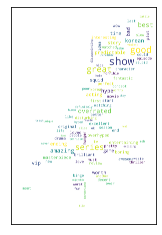

In [55]:
word_cloud = WordCloud(# 设置背景色
     # 设置背景色
        background_color='white',
        # 设置背景宽
        width=600,
        # 设置背景高
        height=1000,
        # 最大字体
        max_font_size=50,
        # 最小字体
        min_font_size=10,
        scale=5,
        mask=mg,
        mode='RGBA')
word_cloud.fit_words(dic)
plt.imshow(word_cloud)
plt.xticks([])#去掉横坐标
plt.yticks([])#去掉纵坐标
plt.show()

In [56]:
word_cloud.to_file('imdb评论标题_top100_based_on_tf值.png')

In [57]:
imdb_title_tail_100=tf1.sort_values(['tf'], ascending=False).tail(100)
imdb_title_tail_100.to_csv('imdb_标题_tail_100.csv')